# Computation of the eigenvalues of the covariance matrix of an ADSN distribution

For a given texton, we compute the eigenvalues of the covariance matrix associated with its ADSN distribution.

In [1]:
import torch
import pylab as plt
import numpy as np
from torchvision.transforms.functional import to_tensor, to_pil_image
from IPython.display import display
from PIL import Image

## 1. Load the texton

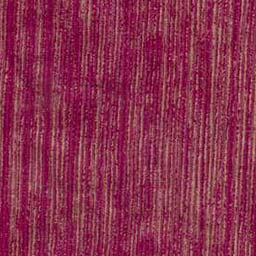

Shape of the image:
(3, 256, 256)


In [2]:
im_pil = Image.open('./fabric.png')
display(im_pil)
img = to_tensor(im_pil).numpy()
print('Shape of the image:')
print(img.shape)
_,M,_ = img.shape

## 2. Compute the eigenvalues

Note that the ADSN model is in general associated with the perdiodic component of an image. For this reason, the function *perdecomp_fft* is used here.

In [3]:
from perdecomp import perdecomp_fft
m = np.mean(img,axis=(1,2))
t = (img-m.reshape(3,1,1))/np.sqrt(M*M)
t_fft = perdecomp_fft(torch.tensor(t)).numpy().reshape(1,3,256,256)

In [4]:
vps = np.zeros((3*256*256))
vps[:256*256] = np.sum(np.abs(t_fft)**2,axis=1).reshape(256*256)

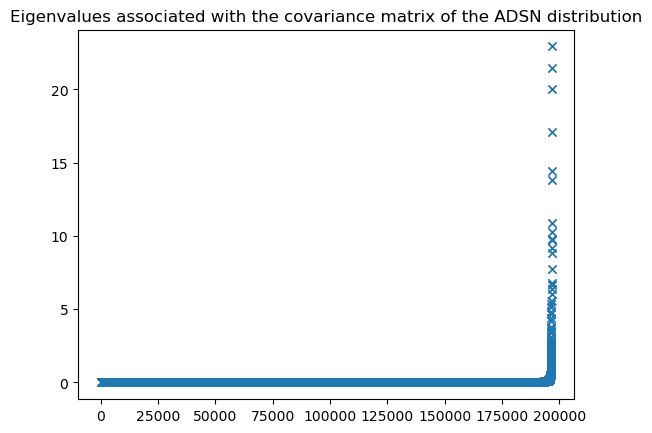

In [5]:
plt.title('Eigenvalues associated with the covariance matrix of the ADSN distribution')
plt.plot(np.sort(vps),'x')

## 3. Observation of samples

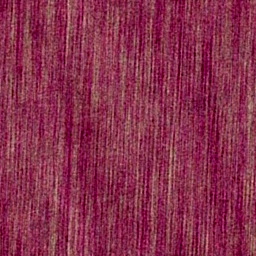

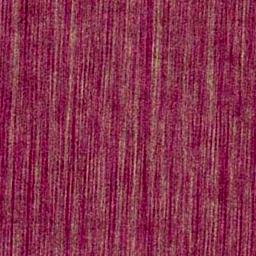

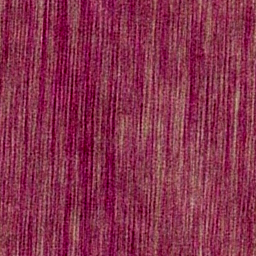

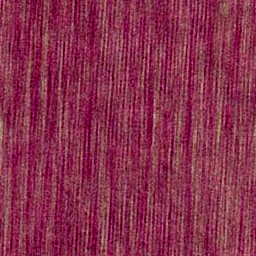

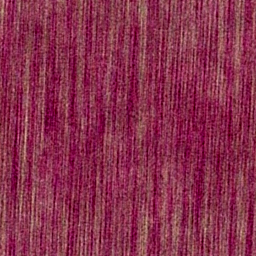

In [6]:
batch_size = 5

W_fft = np.fft.fft2(np.random.randn(batch_size,1,M,M))

sample = m.reshape(1,3,1,1)+np.real(np.fft.ifft2(W_fft*t_fft))

for k in range(batch_size) :
    display(to_pil_image(torch.tensor(sample[k].clip(0,1))))